# Canonical Reactors I

* Zero-dimensional reactors. 
    * No spatial dependence.
    * Evolve in time (or space for the PFR).
* Batch reactors
    * Constant TP
    * Constant TV
    * Constant HP
    * Constant UV
* Plug flow reactors (PFR)
* Perfectly stirred reactor (PSR), also called a continuous stirred tank reactor (CSTR)
    * These are flow reactors.
    
#### Approach
* Couple kinetics with conservation laws for heat and mass balances.
* These reactors provide convenient, well-characterized baselines for more complicated flow processes.
* **All equations below are on a mass basis: $h$ is J/kg**, etc.

    

## Batch reactor: TP
* Batch reactor is a closed system $\rightarrow$ **constant mass.**
* Specify an initial state: $T$, $P$, $y_i$.
* Mass balance:
$$\dot{m}_{accum} = \dot{m}_{in} - \dot{m}_{out} + \dot{m}_{generation}$$
* $\dot{m}_{in} = \dot{m}_{out} = 0$, so we have
$$\dot{m}_{accum} = \dot{m}_{generation}$$
* Now, write in the details, where $\dot{m}_i^{\prime\prime\prime}$ is the net mass generation rate of species $i$ with units of kg/m$^3$*s, and $V$ is volume.
$$\frac{dm_i}{dt} = \dot{m}^{\prime\prime\prime}_i V,$$

$$\frac{dmy_i}{dt} = \dot{m}^{\prime\prime\prime}_i V,$$
* $m=\rho V$ is constant:
$$\frac{dy_i}{dt} = \frac{\dot{m}^{\prime\prime\prime}_i V}{\rho V},$$

<font color="blue">
$$\frac{dy_i}{dt} = \frac{\dot{m}^{\prime\prime\prime}_i}{\rho}.$$
</font>

* Also, we have
<font color="blue">
$$\rho = \frac{MP}{RT},$$
</font>

<font color="blue">
$$M = \frac{1}{\sum_iy_i/M_i},$$
</font>

<font color="blue">
$$\dot{m}_i^{\prime\prime\prime} = \dot{m}_i^{\prime\prime\prime}(T,P,y_i).$$
</font>

* That is, we have $N_{sp}$ ODEs for each species mass fraction. All other terms are written in terms of the $y_i$ and the known $T$, $P$.
* The last blue equation indicates the functional dependence of the species rates, which are given in terms of kinetic expressions for the given combustion mechanism.
* At constant pressure, the volume will vary. The volume per unit mass is simply $1/\rho$, where $\rho$ at any time is given by the ideal gas law in terms of the composition at any time.


## Batch reactor: TV

* If volume (or more likely, volume per unit mass, so that the 0-D system is intensive) is given instead of pressure, then the system density is constant (and is known from the initial state.) 
* The previous equations hold, but $\rho$ is known. 
* The ideal gas law can be used to solve for $P$, which now varies.


## Batch reactor: HP
* For an adiabatic, constant pressure reactor, the previous equations all hold, but now temperature will vary.
* The energy conservation equation becomes 

<font color="blue">
$$h = \text{constant},$$
</font>

<font color="blue">
$$\frac{dh}{dt} = 0.$$
</font>

* The system enthalpy is known from the initial state. 
* At any given time, the temperature may be found by solving $h=h(T,y_i)$ for $T$ given the known $h$, and the current $y_i$. 
* In Cantera, if ```h0``` is our enthalpy, this calculation is done internally, and we would simply write: 
```python
gas.HPY = h0, P, y
T = gas.T
```

### Temperature equation
* Alternatively, we can derive a temperature equation as follows.

$$\frac{dh}{dt} = 0,$$

$$h = h(T, y_i),$$

$$dh = \underbrace{\frac{\partial h}{\partial T}}_{c_p}dT + \sum_i\underbrace{\frac{\partial h}{\partial y_i}}_{h_i}dy_i,$$


Now divide through by $dt$:

$$\frac{dh}{dt} = c_p\frac{dT}{dt} + \sum_ih_i\frac{dy_i}{dt} = 0,$$

Use $dy_i/dt = \dot{m}_i^{\prime\prime\prime}/\rho$, and solve for $dT/dt$:

<font color="blue">
$$\frac{dT}{dt} = -\frac{1}{\rho c_p}\sum_ih_i\dot{m}_i^{\prime\prime\prime}.$$
</font>

Also,
<font color="blue">
$$c_p = \sum_iy_ic_{p,i},$$
</font>

<font color="blue">
$$h_i = h_{f,i}(T_{ref}) + \int_{T_{ref}}^{T}c_{p,i}dT.$$
</font>


## Batch reactor: UV
* If we have an adiabatic, constant volume batch reactor, then then energy equation is written in terms of internal energy $u$ instead of enthalpy, and $c_v$ instead of $c_p$.
* Also, $\rho$ is constant as for the TV system above.

<font color="blue">
$$u = \text{constant},$$
</font>

<font color="blue">
$$\frac{du}{dt} = 0.$$
</font>

<font color="blue">
$$\frac{dT}{dt} = -\frac{1}{\rho c_v}\sum_iu_i\dot{m}_i^{\prime\prime\prime}.$$
</font>

Also,
<font color="blue">
$$c_v = \sum_iy_ic_{v,i},$$
</font>

<font color="blue">
$$u_i = u_{f,i}(T_{ref}) + \int_{T_{ref}}^{T}c_{v,i}dT.$$
</font>

## Plug flow reactors (PFR)

* Instead of a batch reactor evolving in time, we have a flow reactor evolving in space (flow in a tube, say). 
* Radial mixing is perfect, and the "plug" of fluid moves down the tube without mixing axially.
* Hence, the plug behaves as a batch reactor, reacting in time. But the plug is at a different spatial location at each time.
* Convert time $t$ to spatial location $z$:

$$\frac{d}{dt} = \frac{d}{dz}\frac{dz}{dt} = v\frac{d}{dz}.$$

* That is, we transform from time to space using the local velocity: $v = dz/dt\rightarrow dt = dz/v$.
* Now, for a PFR, the mass flux is constant (even though the local velocity may vary):

<font color="blue">
$$\dot{m}^{\prime\prime} = \text{constant}$$
</font>

$$\dot{m}^{\prime\prime} = \rho v\rightarrow v = \dot{m}^{\prime\prime}/\rho$$

Hence,

<font color="green">
$$\frac{d}{dt} \rightarrow \frac{\dot{m}^{\prime\prime}}{\rho}\frac{d}{dz}$$
</font>

* So, in all the previous equations, wherever you see $d/dt$, replace it with the relation above.
* You will have to specify the mass flux.


## Perfectly stirred reactor (PSR)
* This is a flow reactor with an inlet and an outlet.
* The outlet composition is the same as the reactor composition.
* This can be constant temperature or adiabatic.
* Characterized by the reactor size (volume $V$) and flow rate $\dot{m}$.
    * These can be combined as $\tau = \rho V/\dot{m}$, where $\tau$ is the PSR residence time.
    * The PSR has one key parameter, $\tau$, which is the mixing timescale of the reactor.
* We can write steady or unsteady versions of the reactor.

### Unsteady PSR

* Assumptions:
    * Mass $m$ in the PSR is constant.
    * $\dot{m}_{in}=\dot{m}_{out}$.
* Species balance equation:
$$\dot{m}_{accum} = \dot{m}_{in} - \dot{m}_{out} + \dot{m}_{generation},$$

$$\frac{dmy_i}{dt} = \dot{m}y_{i,in} - \dot{m}y_{i} + \dot{m}_i^{\prime\prime\prime}V,$$

$$\frac{dy_i}{dt} = \frac{\dot{m}}{m}(y_{i,in} - y_{i}) + \frac{\dot{m}_i^{\prime\prime\prime}V}{m},$$

<font color="blue">
$$\frac{dy_i}{dt} = \frac{(y_{i,in} - y_{i})}{\tau} + \frac{\dot{m}_i^{\prime\prime\prime}}{\rho}.$$
</font>

* Energy balance equation.
    * If the reactor is isothermal, we just specify a constant temperature.
    * For an adiabatic reactor (with constant $m$ and $\dot{m}_{in}=\dot{m}_{out}$, we have
    
$$\frac{dh}{dt} = h_{in} - h.$$

* <font color="blue"> If the initial $h$ is equal to $h_{in}$ (so make the initial composition equal to the inlet composition for consistency), then we have
$$\frac{dh}{dt} = 0,$$
$$h = h_0 = \text{constant}.$$
</font>

* Temperature can be found implicitly by solving $h=h(T,y_i)$, as noted above.
* Alternatively, we can formulate and solve a temperature equation:



#### Temperature equation
* The temperature equation parallels the treatment for a batch reactor, where we also had the $dh/dt=0$ equation:

$$\frac{dh}{dt} = c_p\frac{dT}{dt} + \sum_ih_i\frac{dy_i}{dt} = 0,$$

* Solve for $dT/dt$ and use our PSR equation above for $dy_i/dt$:

$$\frac{dT}{dt} = -\frac{1}{c_p}\sum_ih_i\frac{dy_i}{dt}.$$

<font color="blue">
$$\frac{dT}{dt} = -\frac{1}{c_p}\sum_ih_i\left(\frac{(y_{i,in}-y_i)}{\tau} + \frac{\dot{m}_i^{\prime\prime\prime}}{\rho}\right).$$
</font>
    
#### Solution approach

* Note that the equations for an unsteady PSR are very similiar to those for a batch reactor, and we can use the same code to solve both systems. 
* Often, an unsteady PSR is solved to steady state by solving the ODE system for *long enough*.
* Alternatively, we can directly solve the steady problem by setting the $d/dt$ terms to zero. We then have a coupled system of nonlinear algebraic equations that we can solve using, e.g., Newton's method.

## PSR Note
* Consider again the unsteady PSR equations for species:

$$\frac{dy_i}{dt} = \frac{(y_{i,in} - y_{i})}{\tau} + \frac{\dot{m}_i^{\prime\prime\prime}}{\rho}.$$

* At steady state we have
$$\frac{(y_{i} - y_{i,in})}{\tau} = \frac{\dot{m}_i^{\prime\prime\prime}}{\rho},$$

$$(\text{mixing term}) = (\text{reaction term}).$$

* That is, mixing balaces reaction.
* $\tau$ is the mixing timescale and $1/\tau$ is a mixing rate. Hence, we have (mixing rate)=(reaction rate).
* As $\tau$ decreases, the mixing rate increases, and eventually the chemical reaction rate cannot match it. 
    * At that point, the PSR blows out.
    * The balance still holds, but we get the trivial solution 0 = 0.
    * We can decrease $\tau$ by increasing $\dot{m}$, or by decreasing volume $V$.

#### Chemical timescale
* Combustion chemistry is complex and there is **no one reaction rate** (or no one reaction timescale). 
    * However, at the point just before blowout, we can take $\tau_0$ as the characteristic chemical timescale. 
    * We can then compare $\tau_0$ to some other mixing timescale to define a Damkohler number: $Da = \tau/\tau_0$.

#### Analogy with diffusive mixing

* Consider the unsteady diffusion equation:

$$\frac{\partial y_i}{\partial t} = D\frac{\partial^2y_i}{\partial x^2}.$$

* If we nondimensionalize this equation, then we need a timescale $\tau$, a lengthscale $L$, and a scale $y_{i,ref}$ (which cancels).

* The nondimensional form is 
$$\frac{1}{\tau}\frac{\partial y_i^*}{\partial t^*} = \frac{D}{L^2}\frac{\partial^2y_i^*}{\partial x^{*2}}.$$
* Here, starred variables are nondimensional.
* If we chose appropriate reference values, then the magnitude of terms $\partial y_i^*/\partial t^*$ and $\partial^2y_i^*/\partial x^{*2}$ are both $\mathcal{O}(1)$.
* This gives
$$\tau = \frac{L^2}{D}$$
as the characteristic diffusion timescale.

* Hence, we can write:

$$D\frac{\partial^2 y_i}{\partial x^2}\sim D\frac{\Delta y_i}{L^2} \sim \frac{\Delta y_i}{\tau}$$

But this is just our PSR mixing term. The point is, that the PSR mixing term can be used as an analogy to more complex diffusive mixing in terms of a mixing timescale, where mixing and reaction processes are in a kind of balance.

## HP Batch Reactor code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
import cantera as ct

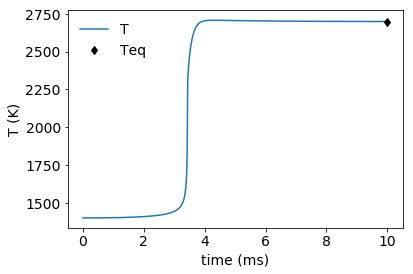

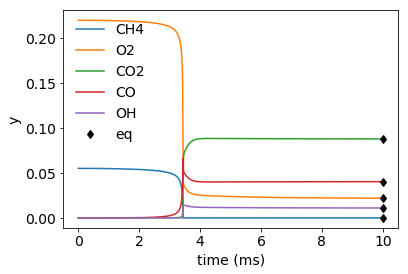

In [2]:
gas = ct.Solution("gri30.yaml")

#------------- Set batch reactor equation

def rhsf(y,t):
    gas.HPY = h0, gas.P, y
    return gas.net_production_rates * gas.molecular_weights / gas.density

#------------- set initial condition and enthalpy

gas.TPX = 1400, 101325, "CH4:1, O2:2, N2:7.52"
h0 = gas.enthalpy_mass
y0 = gas.Y

#------------- solve the ODE system

nt = 1000
times = np.linspace(0,0.01,nt)
y = odeint(rhsf, y0, times)

#------------- recover the temperature

T = np.zeros(nt)
for i in range(nt):
    gas.HPY = h0, gas.P, y[i,:]
    T[i] = gas.T

#------------- equilibrium state

gas.equilibrate("HP")
Teq = gas.T
yeq = gas.Y

#------------- plot results

plt.rc("font", size=14)
plt.plot(times*1000,T, label="T")
plt.plot(times[-1]*1000,Teq, 'kd', label="Teq")
plt.xlabel("time (ms)")
plt.ylabel("T (K)")
plt.legend(frameon=False);

plt.figure()
species = ["CH4", "O2", "CO2", "CO", "OH"]
for sp in species:
    plt.plot(times*1000,y[:,gas.species_index(sp)], label=sp)
    plt.plot(times[-1]*1000,yeq[gas.species_index(sp)], 'kd', label="eq" if sp==species[-1] else "")
plt.xlabel("time (ms)")
plt.ylabel("y")
plt.legend(frameon=False);


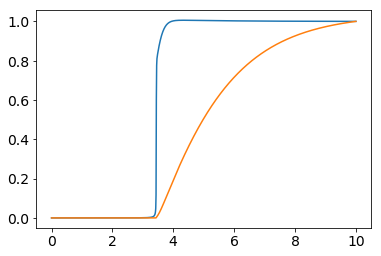

In [3]:
plt.plot(times*1000, y[:,gas.species_index("CO2")]/y[-1,gas.species_index("CO2")])
plt.plot(times*1000, y[:,gas.species_index("NO")]/y[-1,gas.species_index("NO")])